In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [3]:
data_242 = pd.read_csv('./Data/NA242.csv')
data_242.set_index('PSNO_NA_ECP', inplace=True)
# Drop rows that contain 'missing' in any cell
data_242_pti = data_242[~data_242.astype(str).apply(lambda x: x.str.contains('missing', case=False)).any(axis=1)]
data_242_pti = data_242_pti.sort_index()
data_242_pti = data_242_pti.dropna()
data_242 = data_242.sort_index()
yellow = '#FFC300'
blue = '#00b0be' 
pink = '#f45f74' 
orange = '#FF5F1F'
light_blue = '#8fd7d7'
light_pink = '#ff8ca1'

## **Graph 1**
Number of Polling Stations won by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_33435/3215221296.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


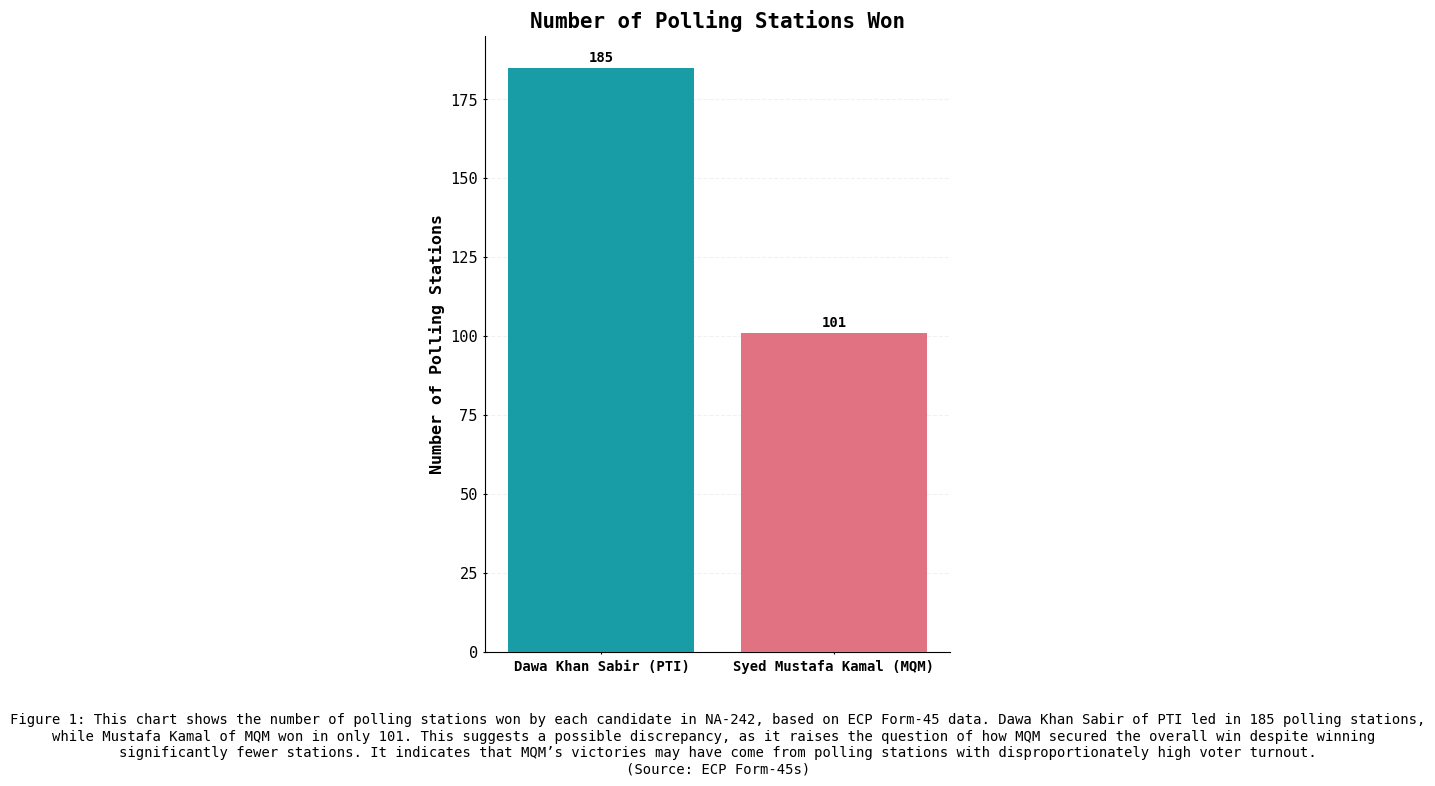

In [5]:
font_family = 'monospace'
sns.set_style({
    'axes.facecolor': 'none',
    'grid.color': 'lightgrey',
    'axes.edgecolor': 'black',
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.bottom': True,
    'ytick.left': True,
    'font.family': font_family,
    'font.size': 12
})

data_242_ECP_Winner = data_242['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_242_ECP_Winner))]

plt.figure(figsize=(6, 8))
ax = plt.gca()

bars = sns.barplot(
    x=data_242_ECP_Winner.index,
    y=data_242_ECP_Winner.values,
    hue=data_242_ECP_Winner.index,
    legend=False,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_242_ECP_Winner.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold', ha='center')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.text(
    0.5, -0.15,
    'Figure 1: This chart shows the number of polling stations won by each candidate in NA-242, based on ECP Form-45 data. Dawa Khan Sabir of PTI led in 185 polling stations,\n' 
    'while Mustafa Kamal of MQM won in only 101. This suggests a possible discrepancy, as it raises the question of how MQM secured the overall win despite winning \n'
    'significantly fewer stations. It indicates that MQM’s victories may have come from polling stations with disproportionately high voter turnout.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
    transform=plt.gca().transAxes
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_1.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 2**
Number of Votes received by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s)


/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_33435/1620458860.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


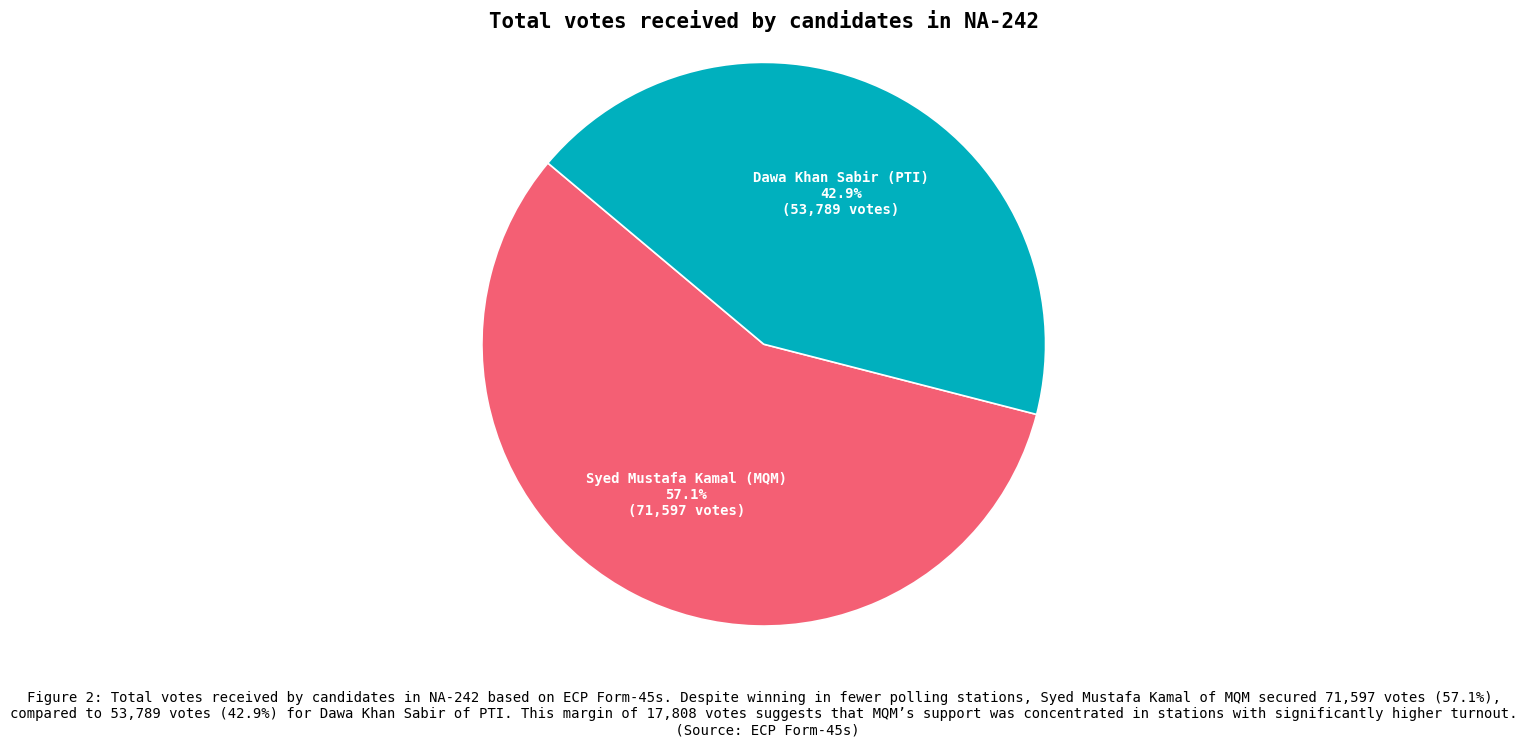

In [15]:
data_242_votes_ecp = data_242[['OPP_VOTES_ECP', 'PTI_VOTES_ECP']].sum()
data_242_votes_ecp.index = ['Syed Mustafa Kamal (MQM)', 'Dawa Khan Sabir (PTI)']
candidate_colors = {
    'Syed Mustafa Kamal (MQM)': pink,
    'Dawa Khan Sabir (PTI)': blue
}
colors = [candidate_colors[name] for name in data_242_votes_ecp.index]
labels = data_242_votes_ecp.index
values = data_242_votes_ecp.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-242', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
plt.text(
    0.5, -0.1,
    'Figure 2: Total votes received by candidates in NA-242 based on ECP Form-45s. Despite winning in fewer polling stations, Syed Mustafa Kamal of MQM secured 71,597 votes (57.1%),\n'
    'compared to 53,789 votes (42.9%) for Dawa Khan Sabir of PTI. This margin of 17,808 votes suggests that MQM’s support was concentrated in stations with significantly higher turnout.\n (Source: ECP Form-45s)',
    wrap=False,
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_2.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 3**
Distribution of Turnout percentages in General Elections 2024 in NA-242 (Based on ECP Form-45s) NA

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_33435/491168146.py:20: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_33435/491168146.py:20: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.05`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(


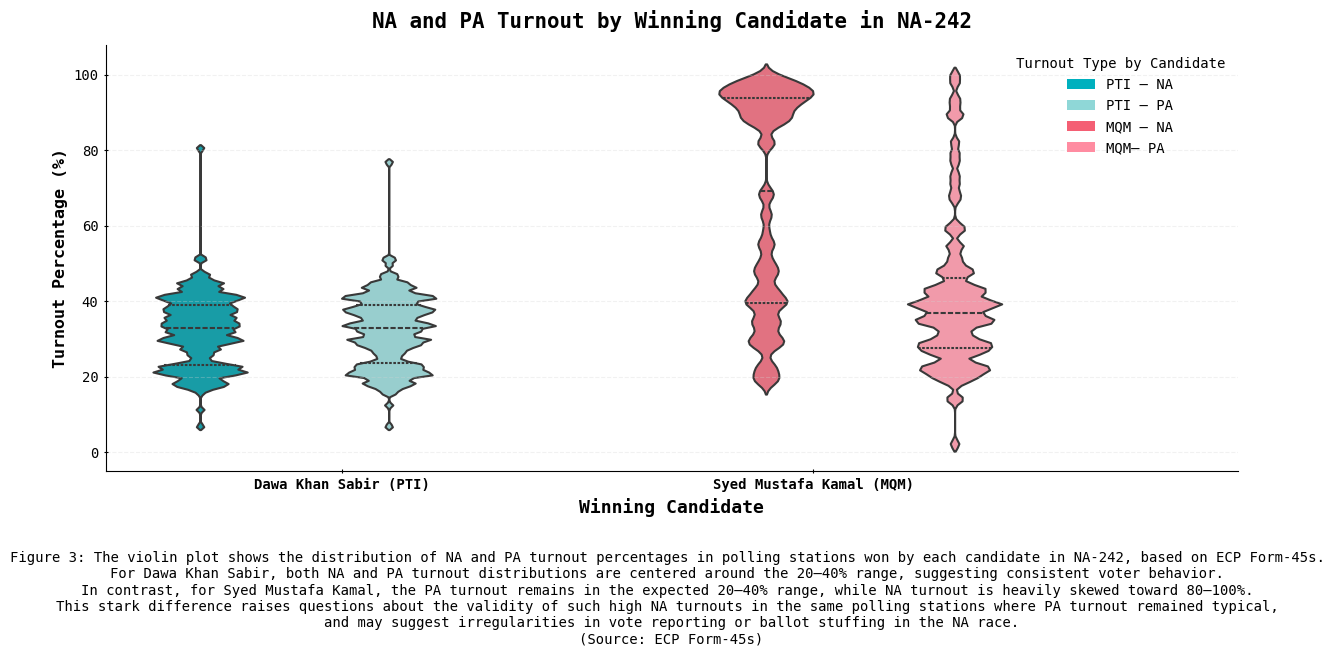

In [9]:
df_long = data_242[['WINNER_ECP', 'TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP']].copy()
df_long = df_long.melt(
    id_vars='WINNER_ECP',
    value_vars=['TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP'],
    var_name='Turnout Type',
    value_name='Turnout Percentage'
    )
df_long['Turnout Type'] = df_long['Turnout Type'].str.replace('TURNOUT_', '').str.replace('_PERCENTAGE_ECP', '')
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].astype(float)

# Define colors for the violin plot
palette = {
    ('Dawa Khan Sabir (PTI)', 'NA'): blue,
    ('Dawa Khan Sabir (PTI)', 'PA'): light_blue,
    ('Syed Mustafa Kamal (MQM)', 'NA'): pink,
    ('Syed Mustafa Kamal (MQM)', 'PA'): light_pink
}
df_long['Hue Group'] = list(zip(df_long['WINNER_ECP'], df_long['Turnout Type']))
plt.figure(figsize=(14, 7))
ax = sns.violinplot(
    x='WINNER_ECP',
    y='Turnout Percentage',
    hue='Hue Group',
    data=df_long,
    palette=palette,
    inner='quartile',
    linewidth=1.5,
    scale='width',
    bw=0.05,
    dodge=True
)

plt.xlabel('Winning Candidate', fontsize=13, fontweight='bold')
plt.ylabel('Turnout Percentage (%)', fontsize=12, fontweight='bold')
plt.title('NA and PA Turnout by Winning Candidate in NA-242', fontsize=15, fontweight='bold', pad=12)
plt.xticks(fontsize=10, fontweight='semibold')
plt.yticks(fontsize=10)
plt.xlim(-0.5, 1.9)
ax.grid(axis='y', linestyle='--', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=blue, label='PTI – NA'),
    Patch(facecolor=light_blue, label='PTI – PA'),
    Patch(facecolor=pink, label='MQM – NA'),
    Patch(facecolor=light_pink, label='MQM– PA')
]
ax.legend(handles=legend_elements, title='Turnout Type by Candidate', loc='upper right', frameon=False)

plt.text(
    0.5, -0.3,
    'Figure 3: The violin plot shows the distribution of NA and PA turnout percentages in polling stations won by each candidate in NA-242, based on ECP Form-45s. \n'
    'For Dawa Khan Sabir, both NA and PA turnout distributions are centered around the 20–40% range, suggesting consistent voter behavior. \n'
    'In contrast, for Syed Mustafa Kamal, the PA turnout remains in the expected 20–40% range, while NA turnout is heavily skewed toward 80–100%. \n'
    'This stark difference raises questions about the validity of such high NA turnouts in the same polling stations where PA turnout remained typical, \n'
    'and may suggest irregularities in vote reporting or ballot stuffing in the NA race.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
    transform=ax.transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_3.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 4**
Number of polling stations won by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s) where turnout difference between NA and PA was more than 50 votes

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_33435/2244139352.py:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


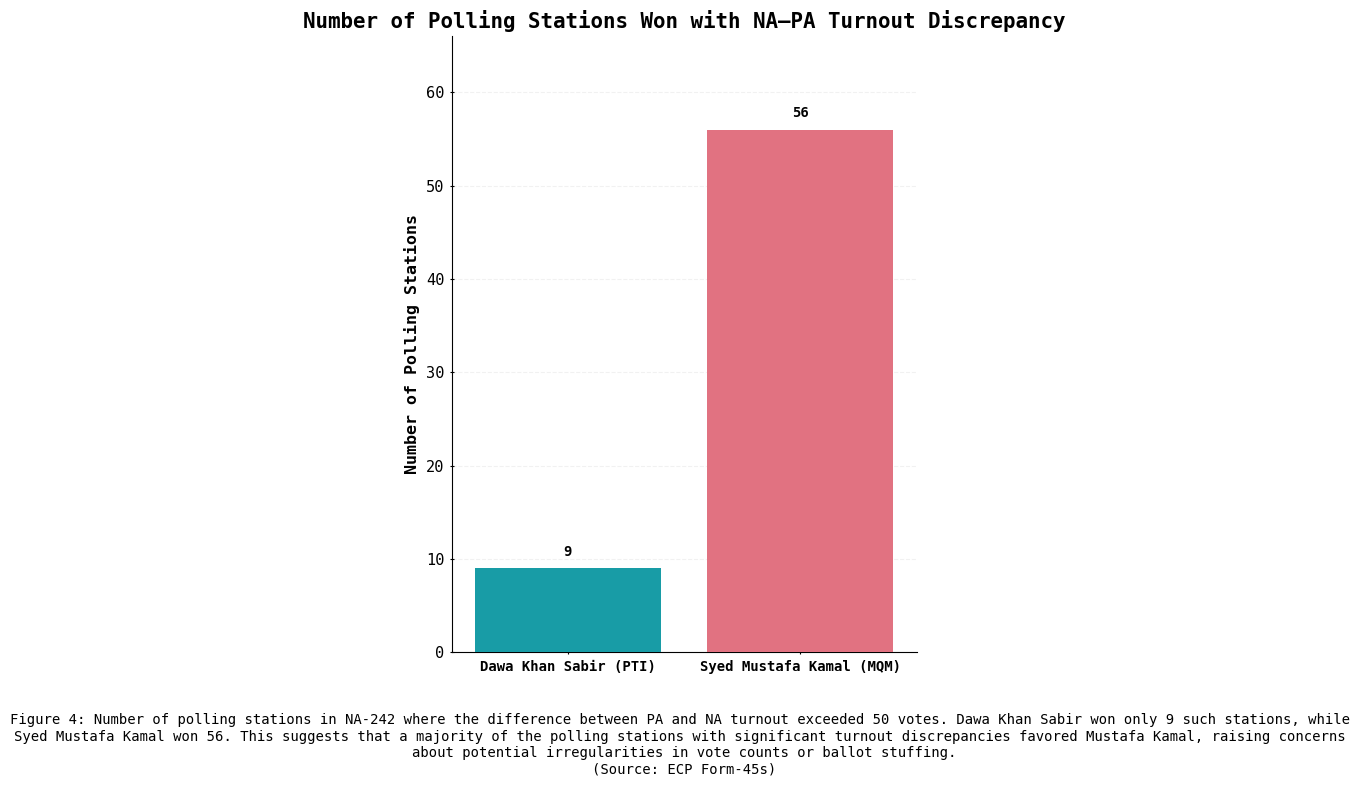

In [11]:
data_242_Discrepency = data_242[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_242_Discrepency = data_242_Discrepency[abs(data_242_Discrepency['TURNOUT_DIFFERENCE']) >= 50]

data_242_ECP_Winner_discrepency = data_242_Discrepency['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_242_ECP_Winner_discrepency))]

plt.figure(figsize=(6, 8))
ax = plt.gca()

bars = sns.barplot(
    x=data_242_ECP_Winner_discrepency.index,
    y=data_242_ECP_Winner_discrepency.values,
    hue=data_242_ECP_Winner_discrepency.index,
    
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won with NA–PA Turnout Discrepancy', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_242_ECP_Winner_discrepency.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.text(
    0.5, -0.15,
    'Figure 4: Number of polling stations in NA-242 where the difference between PA and NA turnout exceeded 50 votes. Dawa Khan Sabir won only 9 such stations, while \n'
    'Syed Mustafa Kamal won 56. This suggests that a majority of the polling stations with significant turnout discrepancies favored Mustafa Kamal, raising concerns \n'
    'about potential irregularities in vote counts or ballot stuffing.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_4.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 5**
This shows the distribution of absolute turnout differences between NA and PA polling stations in General Elections 2024 in NA-242 (Based on ECP Form-45s)

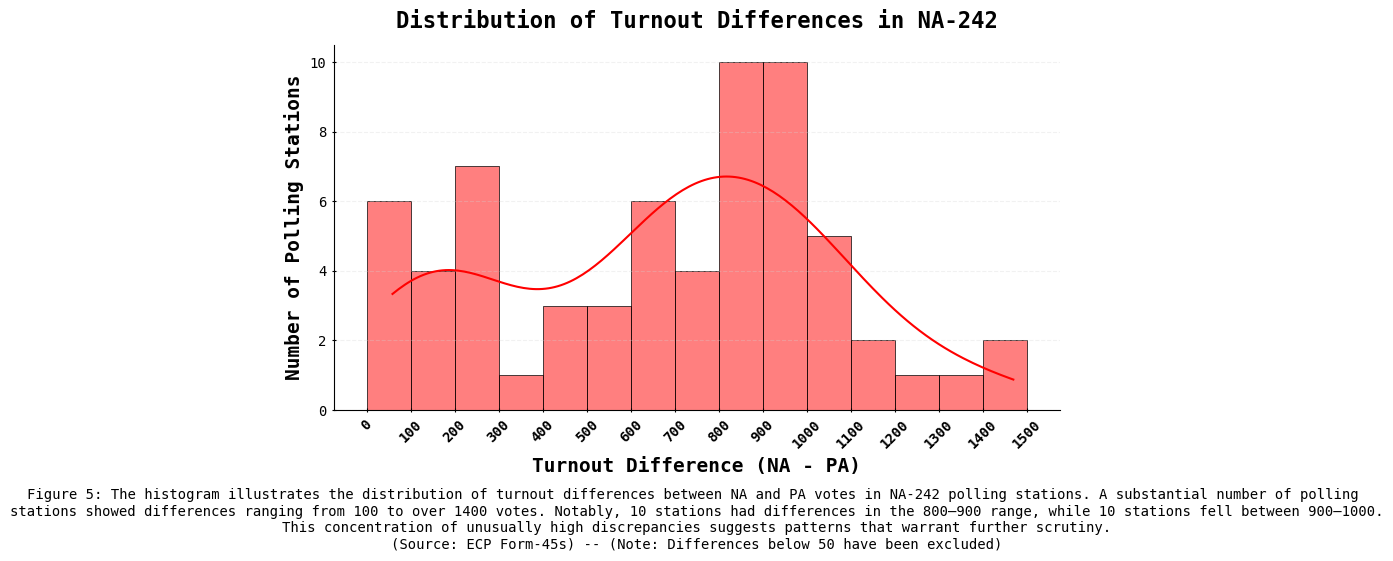

In [7]:
data_242_discrepency = data_242[['TURNOUT_DIFFERENCE']].copy()
data_242_discrepency = data_242_discrepency[abs(data_242_discrepency['TURNOUT_DIFFERENCE']) >= 50]

min_diff = (data_242_discrepency['TURNOUT_DIFFERENCE'].min() // 100) * 100
max_diff = (data_242_discrepency['TURNOUT_DIFFERENCE'].max() // 100 + 1) * 100
bin_edges = np.arange(min_diff, max_diff + 100, 100)

plt.figure(figsize=(12, 6))
sns.histplot(
    data=data_242_discrepency,
    x='TURNOUT_DIFFERENCE',
    bins=bin_edges,
    kde=True,
    color='red',
    edgecolor='black',
    linewidth=0.5
)
plt.xlabel('Turnout Difference (NA - PA)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=14, fontweight='bold')
plt.title('Distribution of Turnout Differences in NA-242', fontsize=16, fontweight='bold', pad=12)
plt.xticks(bin_edges, fontsize=10, fontweight='semibold', rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.text(
    0.5, -0.3,
    'Figure 5: The histogram illustrates the distribution of turnout differences between NA and PA votes in NA-242 polling stations. A substantial number of polling \n'
    'stations showed differences ranging from 100 to over 1400 votes. Notably, 10 stations had differences in the 800–900 range, while 10 stations fell between 900–1000.\n'
    'This concentration of unusually high discrepancies suggests patterns that warrant further scrutiny.\n(Source: ECP Form-45s) -- (Note: Differences below 50 have been excluded)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_5.png', dpi=600, bbox_inches='tight')
plt.show()

# **PTI Form 45s**

## **Graph 6**
This graph shows the number of polling stations won by the candidates in General Elections 2024 in NA-242 (Based on PTI Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_33435/2319493061.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


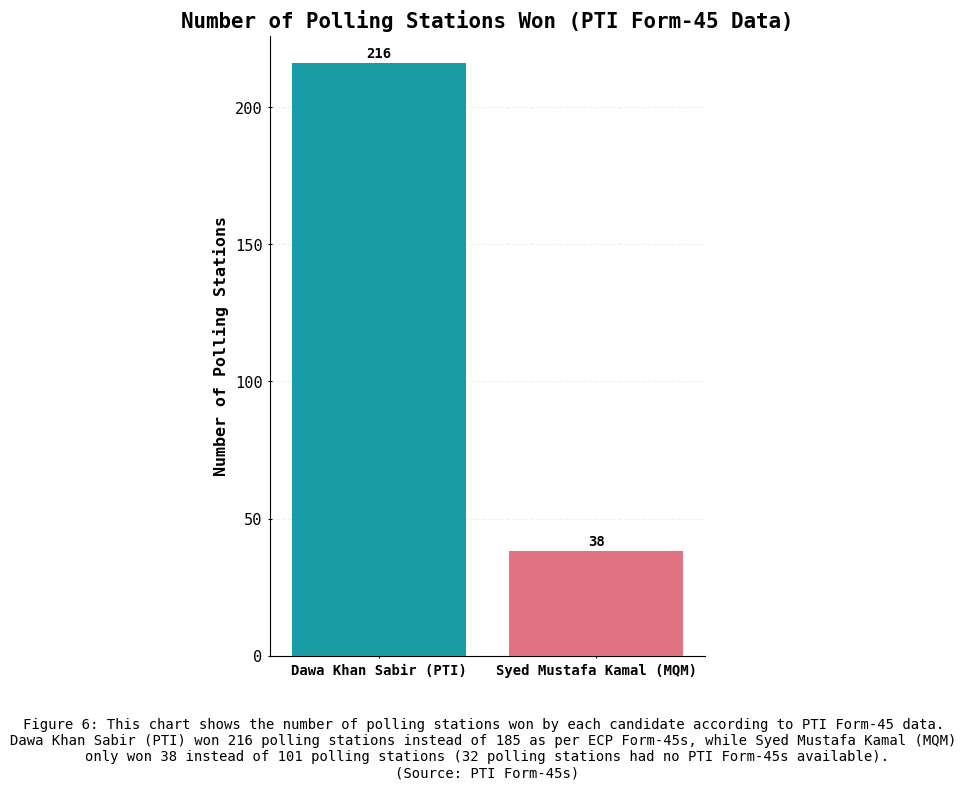

In [12]:
data_242_pti['OPP_VOTES_PTI_NUM'] = pd.to_numeric(data_242_pti['OPP_VOTES_PTI'], errors='coerce')
data_242_pti['PTI_VOTES_PTI_NUM'] = pd.to_numeric(data_242_pti['PTI_VOTES_PTI'], errors='coerce')
data_242_pti['PTI_WINNER'] = np.where(
    data_242_pti['PTI_VOTES_PTI_NUM'] > data_242_pti['OPP_VOTES_PTI_NUM'],
    'Dawa Khan Sabir (PTI)',
    'Syed Mustafa Kamal (MQM)'
)

pti_winner_counts = data_242_pti['PTI_WINNER'].value_counts()
plt.figure(figsize=(8, 8))
ax = plt.gca()

colors = [blue if x == 'Dawa Khan Sabir (PTI)' else pink for x in pti_winner_counts.index]

bars = sns.barplot(
    x=pti_winner_counts.index,
    y=pti_winner_counts.values,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )

plt.title('Number of Polling Stations Won (PTI Form-45 Data)', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(pti_winner_counts.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.text(
    0.5, -0.15,
    'Figure 6: This chart shows the number of polling stations won by each candidate according to PTI Form-45 data. \n'
    'Dawa Khan Sabir (PTI) won 216 polling stations instead of 185 as per ECP Form-45s, while Syed Mustafa Kamal (MQM) \n'
    'only won 38 instead of 101 polling stations (32 polling stations had no PTI Form-45s available).\n(Source: PTI Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_6.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 7**
This shows the number of votes received by each candidate in General Elections 2024 in NA-242 (Based on PTI Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_33435/1247755372.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


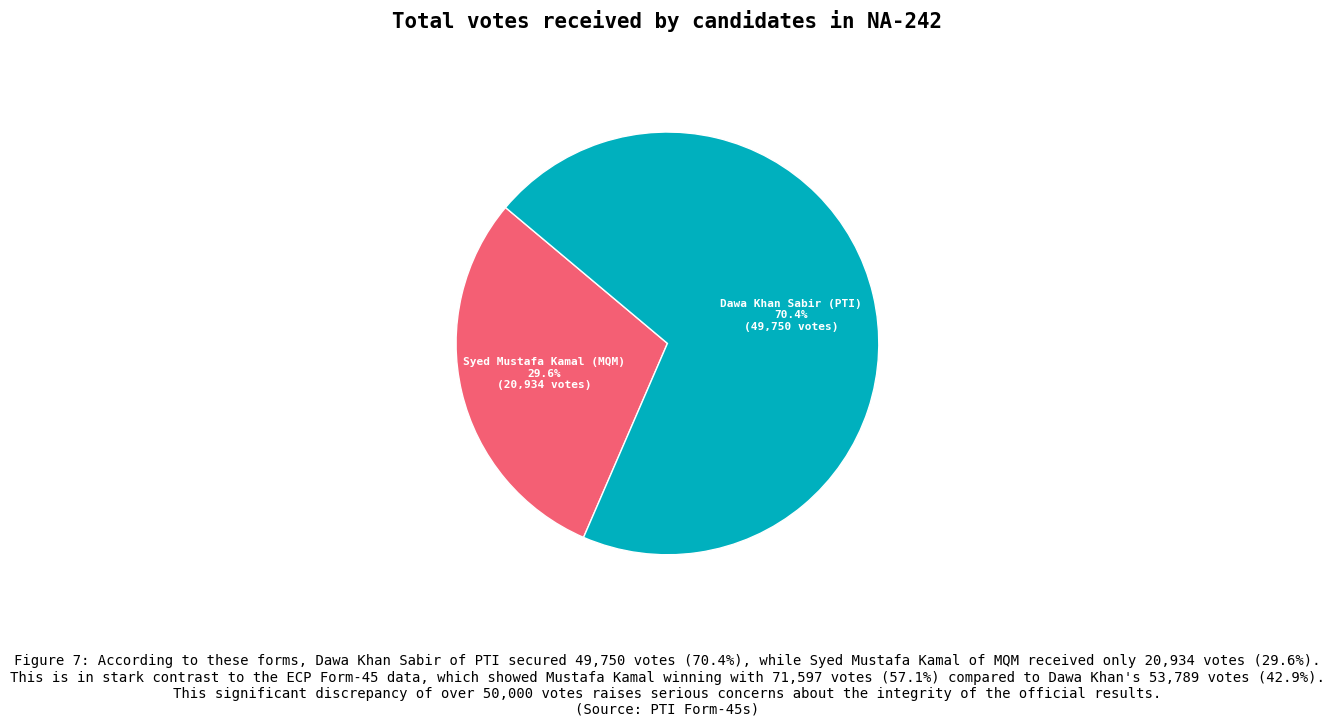

In [22]:
data_242_votes_pti = data_242_pti[['OPP_VOTES_PTI_NUM', 'PTI_VOTES_PTI_NUM']].sum()
data_242_votes_pti.index = ['Syed Mustafa Kamal (MQM)', 'Dawa Khan Sabir (PTI)']
candidate_colors = {
    'Syed Mustafa Kamal (MQM)': pink,
    'Dawa Khan Sabir (PTI)': blue
}
colors = [candidate_colors[name] for name in data_242_votes_pti.index]
labels = data_242_votes_pti.index
values = data_242_votes_pti.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(6, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 8, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-242', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
plt.text(
    0.5, -0.1,
    'Figure 7: According to these forms, Dawa Khan Sabir of PTI secured 49,750 votes (70.4%), while Syed Mustafa Kamal of MQM received only 20,934 votes (29.6%).\n'
    'This is in stark contrast to the ECP Form-45 data, which showed Mustafa Kamal winning with 71,597 votes (57.1%) compared to Dawa Khan\'s 53,789 votes (42.9%).\n'
    'This significant discrepancy of over 50,000 votes raises serious concerns about the integrity of the official results.\n(Source: PTI Form-45s)',
    wrap=False,
    fontsize=10,
    ha='center',
    va='baseline',
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_7.png', dpi=600, bbox_inches='tight')
plt.show()